#BT1 - Selection Operators for Genetic Algorithm with POPOP implementation.


Trong bài tập này, chúng ta sẽ chạy thí nghiệm tìm kích thước quần thể nhỏ nhất cần thiết (minimally required population size - MRPS) để thuật toán di truyền (Genetic Algorithm - GA) với bản cài đặt POPOP cho 3 bài toán OneMax, Trap k=5, và LeadingOnes.

# Import module

In [58]:
# suppresses warnings
# By using warnings.filterwarnings('ignore'), you are telling Python to ignore all warnings.
import warnings
warnings.filterwarnings('ignore')

# "%matplotlib inline" is a magic command specifically used in Jupyter notebooks.
# It instructs Matplotlib, a popular Python library for creating visualizations, to display any generated plots directly within the notebook itself.
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


In [59]:
base_seed = 21521465


# Cài đặt GA


Các bạn cài đặt GA theo bản cài đặt POPOP với tournament selection s = 4, xác suất lai ghép 100%, và không sử dụng đột biến.

## Hàm khởi tạo quần thể


Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

* Arguments:
>* num_individuals -- Số lượng cá thể
>* num_variables -- Số lượng biến

* Returns:
>* pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.

In [60]:
def initialize_population( num_individuals, num_variables ):
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.

    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến

    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """

    pop = np.random.randint(2, size=(num_individuals, num_variables))


    return pop


In [61]:
# np.random.seed(42)
pop = initialize_population(8,4)
print(pop)


[[1 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [0 1 1 0]
 [1 1 1 1]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 1 0]]


##  Hàm đánh giá

### OneMax


Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

* Arguments:
>* ind -- Cá thể cần được đánh giá.

* Returns:
>* value -- Giá trị của cá thể ind.

In [62]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).

    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """

    value = np.sum(ind)

    return value


In [63]:
print(pop[5,:])
print(onemax(pop[5,:]) )


[0 0 0 1]
1


### LeadingOne


Tính số bit 1 đứng trước bit 0 đầu tiên

Tìm vị trí của bit 0 đầu tiên trong chuỗi nhị phân (cá thể ind)

* Arguments:
>* ind -- Cá thể cần được đánh giá.

* Returns:
>* value -- Giá trị của cá thể ind.

In [64]:
def leading_one(ind):
  for i in range(len(ind)):
    if ind[i] == 0: return i
  # end_for

  return len(ind)


In [65]:
ind = np.random.randint(2, size=10)
print(ind)
print(leading_one(ind) )


[0 0 1 0 1 1 0 0 1 1]
0


### Trap-5


* Arguments:
>* ind -- Cá thể cần được đánh giá.

* Returns:
>* value -- Giá trị của cá thể ind.

In [66]:
def trap_5(ind):
  value = 0
  trap_size = 5

  for i in range(0, len(ind), trap_size):
    trap = np.sum(ind[i : min(i + trap_size, len(ind) ) ] )

    if trap < trap_size: trap = trap_size - 1 - trap

    value += trap
  # end_for

  return value


In [67]:
ind = np.random.randint(2, size=20)
print(ind)
print(trap_5(ind) )


[1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1]
7


##  Hàm chọn lọc

### Tournament selection



Chọn lọc giao đấu, không thay thế (without replacement), với tournament size = 4 để chọn N cá thể từ (P+O) pool có kích thước 2N. Đây là cơ chế chọn lọc chuẩn trong POPOP.

* Input:
>* pop: quần thể
>* pop_fitness: độ thích nghi của các cá thể trong quần thể
>* selection_size: số lượng cá thể được chọn
>* tournament_size = 4: kích thước vòng đấu mặc định = 4

* Output:
>* selected_indices: danh sách chỉ số của các cá thể được chọn

In [68]:
def tournament_selection(pop, pop_fitness, selection_size, tournament_size = 4):
  selected_indices = []

  while len(selected_indices) < selection_size:
    # creates an array containing a sequence of numbers starting from 0 and ending at num_individuals-1. Ex: num_individuals = 5 -> [0 1 2 3 4]
    indices = np.arange(len(pop))    # list vị trí chỉ số của các cá thể trong pop

    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)

    # duyệt qua từng vòng đấu
    for i in range(0, len(indices), tournament_size):

      # The min function acts as a safeguard to prevent the slice from extracting elements beyond the valid range of the pop array.
      # It ensures the extracted subset (participants) stays within the array's boundaries.
      participants = indices[i : min([i + tournament_size, len(pop) - 1])]    # lấy chỉ số của các cá thể tham gia vòng đấu trong pop
      participant_fitness = [pop_fitness[i] for i in participants]  # lấy đtn của chúng

      # identifies the winner (individual with the highest fitness) from a set of participants based on their fitness scores
      ranked_participants = np.argsort(participant_fitness)
      winner = participants[ranked_participants[-1]]   # chỉ số của cá thể được chọn trong pop

      selected_indices.append(winner)

      # debug
      # print("participants:", participants)
      # print("ranked_participants:", ranked_participants)
      # print("winner:", ranked_participants[-1], winner)

    # end_for

  # end_while

    # nếu len(selected_indices) > selection_size thì bỏ những cá thể dư
    if len(selected_indices) > selection_size:
      selected_indices = selected_indices[: selection_size]

  return selected_indices


In [69]:
# pop = initialize_population(8,4)
pop = np.array([[0, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 0, 1, 1],
 [0, 1, 0, 0],
 [1, 0, 1, 0]])
pop_fitness = [onemax(x) for x in pop]

print("Pop:", pop)
print("Pop_fitness:", pop_fitness)
print("Selected_indices", tournament_selection(pop, pop_fitness, 4))


Pop: [[0 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [0 1 1 1]
 [1 1 1 1]
 [1 0 1 1]
 [0 1 0 0]
 [1 0 1 0]]
Pop_fitness: [0, 2, 2, 3, 4, 3, 1, 2]
Selected_indices [5, 4, 3, 4]


## Hàm lai ghép

### Hàm lai ghép 1 điểm


Hàm biến đổi tạo ra các cá thể con.

* Arguments:
>* pop -- Quàn thể hiện tại.

* Returns:
>* offspring -- Quần thể chứa các cá thể con được sinh ra.

In [70]:
def one_x_crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])

    # creates an array containing a sequence of numbers starting from 0 and ending at num_individuals-1. Ex: num_individuals = 5 -> [0 1 2 3 4]
    indices = np.arange(num_individuals)    # list vị trí chỉ số của các cá thể trong pop

    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]

        # Cài đặt phép lai 1 điểm
        crossover_point = np.random.randint(1, num_parameters - 2)

        # np.concatenate function takes a tuple of arrays (enclosed in parentheses ()) that you want to join together and concatenates them along a specified axis
        # By default, np.concatenate concatenates arrays along the first axis (typically rows).
        offspring1 = np.concatenate( (pop[idx1][:crossover_point], pop[idx2][crossover_point:]) )
        offspring2 = np.concatenate( (pop[idx2][:crossover_point], pop[idx1][crossover_point:]) )

        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring


In [71]:
pop = np.array([[0, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 0, 1, 1],
 [0, 1, 0, 0],
 [1, 0, 1, 0]])

print("Pop:", pop, sep = '\n')
print("Offspring:", one_x_crossover( pop ), sep = '\n' )


Pop:
[[0 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [0 1 1 1]
 [1 1 1 1]
 [1 0 1 1]
 [0 1 0 0]
 [1 0 1 0]]
Offspring:
[[0 0 1 0]
 [1 1 1 1]
 [0 0 0 0]
 [0 1 0 0]
 [1 0 1 1]
 [1 1 1 1]
 [1 0 0 1]
 [1 0 1 0]]


### Hàm lai ghép đồng nhất (uniform crossover)


Hàm biến đổi tạo ra các cá thể con.

* Arguments:
>* pop -- Quàn thể hiện tại.

* Returns:
>* offspring -- Quần thể chứa các cá thể con được sinh ra.

In [72]:
def ux_crossover( pop ):
    """
    Hàm biến đổi tạo ra các cá thể con.

    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """

    num_individuals = len(pop)
    num_parameters = len(pop[0])

    # creates an array containing a sequence of numbers starting from 0 and ending at num_individuals-1. Ex: num_individuals = 5 -> [0 1 2 3 4]
    indices = np.arange(num_individuals)    # list vị trí chỉ số của các cá thể trong pop

    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []

    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])

        # Cài đặt phép lai đồng nhất uniform crossover.
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx]
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)

    offspring = np.array(offspring)
    return offspring


In [73]:
pop = np.array([[0, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 0, 1, 1],
 [0, 1, 0, 0],
 [1, 0, 1, 0]])

print("Pop:", pop, sep = '\n')
print("Offspring:", ux_crossover( pop ), sep = '\n' )


Pop:
[[0 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [0 1 1 1]
 [1 1 1 1]
 [1 0 1 1]
 [0 1 0 0]
 [1 0 1 0]]
Offspring:
[[1 0 1 0]
 [0 0 0 0]
 [0 0 1 0]
 [1 1 1 1]
 [1 1 1 1]
 [0 0 0 0]
 [1 0 0 1]
 [1 1 1 1]]


## Kiểm tra sự hột tụ

* Input
>* pop: quần thể

* Output
>* true/false

In [74]:
def converging(pop):
    for ind in pop[1:]:
        if np.array_equal(ind, pop[0]) == False:
            return False
        # end_if
    # end_for
    return True


In [75]:
pop = np.array([[0, 0, 0, 0],
 [1, 0, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 1, 1],
 [1, 1, 1, 1],
 [1, 0, 1, 1],
 [0, 1, 0, 0],
 [1, 0, 1, 0]])

print("Pop:", pop, sep = '\n')

if converging(pop):
    print("Converg")
else:
    print("No converg")


Pop:
[[0 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [0 1 1 1]
 [1 1 1 1]
 [1 0 1 1]
 [0 1 0 0]
 [1 0 1 0]]
No converg


In [76]:
pop = np.ones((8, 4))

print("Pop:", pop, sep = '\n')

if converging(pop):
    print("Converg")
else:
    print("No converg")


Pop:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]
Converg


## Hàm genetic_algorithm_popop


### Minh họa

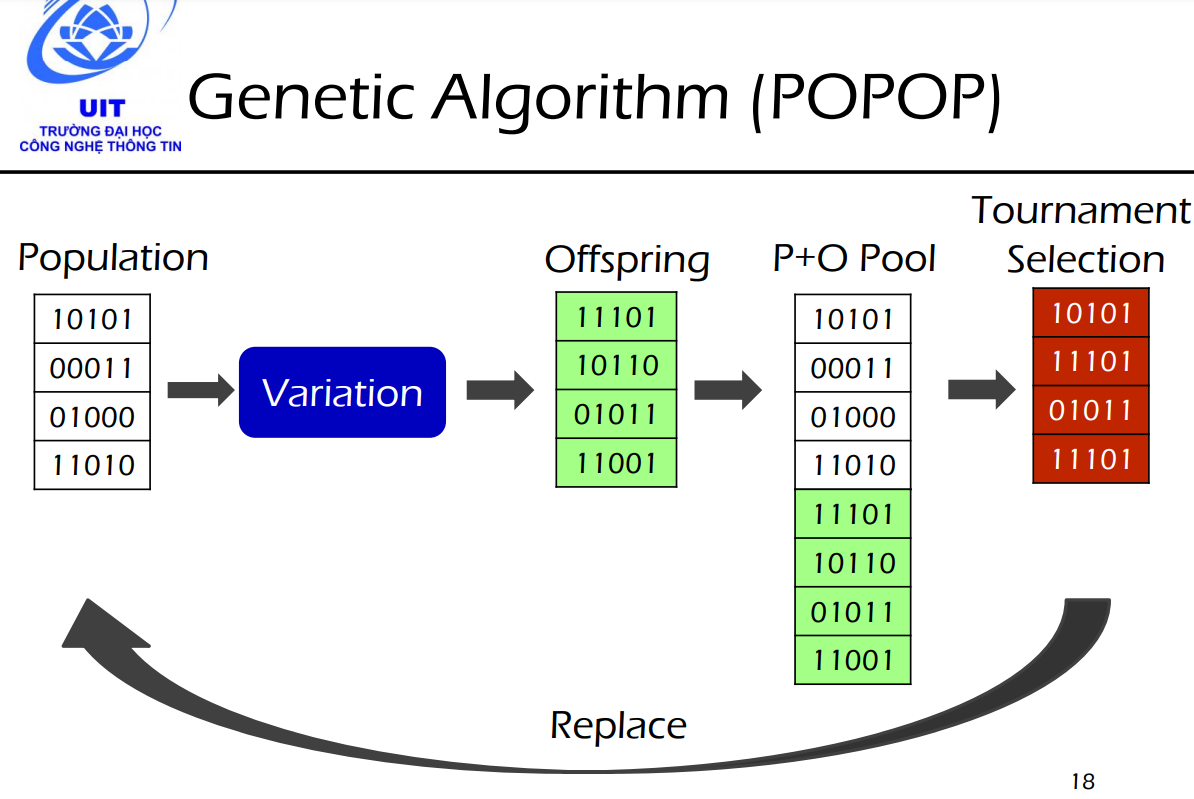

### Thuật toán

* Input
>* objective: hàm đánh giá đtn - fitness
>* crossover: hàm lai ghép
>* num_individuals: số cá thể trong quần thể mỗi thế hệ
>* num_parameters: số gen / bit của cá thể
>* max_evaluations: số lần đánh giá đtn - fitness tối đa
>* verbose=False: ==True -> in kết quả trong quá rình chạy

* Output
>* best_fitness[-1] = [num_evaluations, np.max(pop_fitness)] :
>>* num_evaluations: số lần gọi hàm đánh giá
>>* np.max(pop_fitness): đtn tốt nhất của thế hệ cuối


In [77]:
def genetic_algorithm_popop(objective, crossover, num_individuals, num_parameters, max_evaluations = 1000000, verbose = False):

    pop = initialize_population(num_individuals, num_parameters)    # khởi tạo quần thể
    pop_fitness = np.array([objective(ind) for ind in pop])   # tính độ thích nghi
    num_evaluations = num_individuals   # tính số lần đánh giá đã dùng
    best_fitness = []

    # thêm cá thể có đtn cao nhất hiện tại vào best_fitness
    best_fitness.append([num_evaluations, np.max(pop_fitness)])

    if verbose:
        print("#Gen 0:")
        print(pop_fitness)
    # end_if

    # quần thể đã hội tụ
    if converging(pop):
        return (best_fitness[-1])
    # end_if

    # selection_size = num_individuals    # số cá thể được chọn lọc = nửa kích thước quần thể
    gen = 1   # thế hệ

    # nếu số lần đánh giá đã dùng < số lần đánh giá tối đa thì tiếp tục
    # nếu không thì kết thúc
    while num_evaluations < max_evaluations:

        # lai ghép tạo ra thế hệ con
        offspring = crossover(pop)    # lai ghép -> list các cá thể con
        offspring_fitness = np.array([objective(ind) for ind in offspring])   # tính đtn của các cá thể con
        num_evaluations += len(offspring)   # cộng thêm số lần đánh giá đã dùng

        # combines two arrays, pop and offspring, into a single new array called pop_offspring
        # kết hợp selection_set và offspring thành pop - quần thể mới
        # stacking the two arrays selection_set and offspring on top of each other, one row after another, to form a new array pop
        pop_offspring = np.vstack([pop, offspring])

        # kết hợp pop_fitness và offspring_fitness thành pop_offspring_fitness
        # np.concatenate function takes a tuple of arrays (enclosed in parentheses ()) that you want to join together and concatenates them along a specified axis
        # By default, np.concatenate concatenates arrays along the first axis (typically rows).
        pop_offspring_fitness = np.concatenate((pop_fitness, offspring_fitness))

        # chọn lọc ra các cá thể
        # chọn lọc -> danh sách chỉ số của các cá thể được chọn
        selected_indices = tournament_selection( pop_offspring, pop_offspring_fitness, num_individuals )

        selection_set = [pop_offspring[i] for i in selected_indices]   # lấy ra các cá thể được chọn
        selection_fitness = [pop_offspring_fitness[i] for i in selected_indices]   # lấy đtn của các cá thể được chọn

        # replace
        pop = selection_set
        pop_fitness = selection_fitness

        # thêm cá thể có đtn cao nhất hiện tại vào best_fitness
        best_fitness.append([num_evaluations, np.max(pop_fitness)])

        if verbose:
            print(f'#Gen {gen}:')
            print(pop_fitness)
            gen += 1
        # end_if

        # quần thể đã hội tụ
        if converging(pop):
            return (best_fitness[-1])
        # end_if

    # end_while

    if verbose:
        print('#Final result:')
        print(pop)
        print(pop_fitness)
    # end_if

    return (best_fitness[-1])


In [78]:
result = genetic_algorithm_popop(onemax, one_x_crossover, 4, 4, max_evaluations = 1000000, verbose = False)
print(result)


[12, 4]


# Bisection

Kích thước vấn đề (problem size) l là số biến của vấn đề. Ví dụ:
>* OneMax l = 40 là vấn đề có 40 biến nhị phân.
>* Trap k=5 với l = 20 là vấn đề có 20 biến nhị phân, được tạo nên bởi kết nối 4 hàm Trap k=5 lại với nhau.
>* LeadingOnes l = 10 là vấn đề có 10 biến nhị phân.

## Giai đoạn 1
Tìm cận trên (upper bound) của MRPS

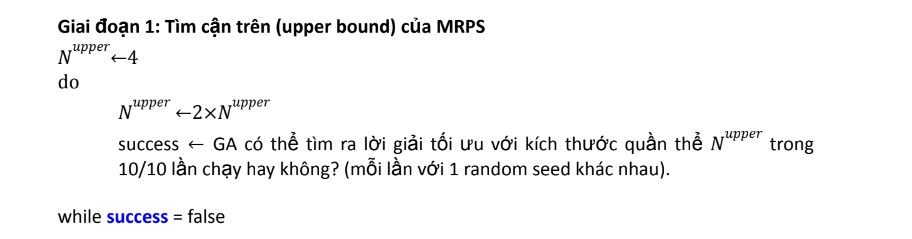

### Code

* Input
>* rd_seeds: list rd seed sẽ đc sd
>* objective: hàm đánh giá đtn - fitness
>* crossover: hàm lai ghép
>* num_parameters: số gen / bit của cá thể / kích thước vấn đề

* Output
>* N_upper nếu tìm được, nếu không thì trả về -1

In [79]:
def find_upper_bound(rd_seeds ,objective, crossover, num_parameters):
    ans = -1
    n_upper = 4
    success = False
    target_fitness = objective( np.ones(num_parameters) )

    while (success == False) and (n_upper <= 8192) :
        n_upper *= 2
        fail = False

        for rd_seed in rd_seeds:
            np.random.seed(rd_seed)

            result = genetic_algorithm_popop(objective, crossover, n_upper, num_parameters)
            result_fitness = result[1]

            if result_fitness < target_fitness:
                fail = True
                break
            # end_if
        # end_for

        if fail == False:
            success = True
        # end_if
    # end_while

    if success == True:
        ans = n_upper
    # end_if

    return ans


In [80]:
seeds = range(10)
n = find_upper_bound(seeds, onemax, one_x_crossover, 10)
print(n)


32


## Giai đoạn 2
Tìm giá trị của MRPS

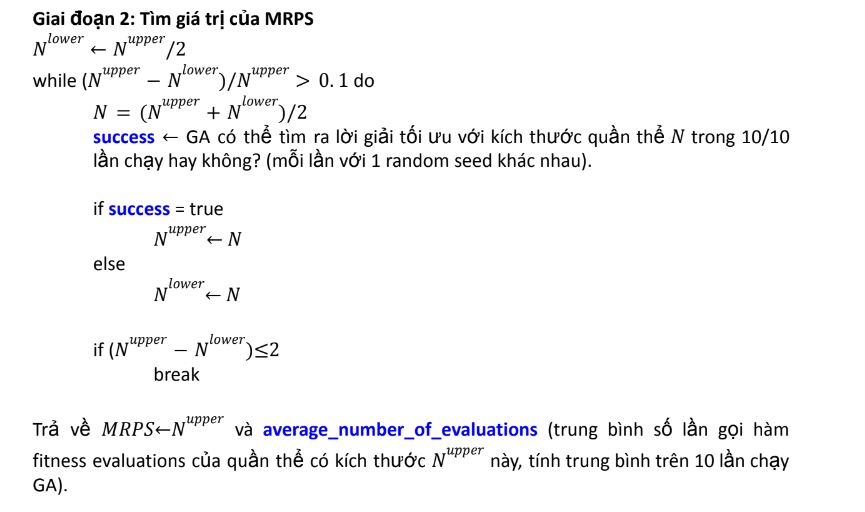

### Code

* Input
>* rd_seeds: list rd seed sẽ đc sd
>* n_upper
>* objective: hàm đánh giá đtn - fitness
>* crossover: hàm lai ghép
>* num_parameters: số gen / bit của cá thể / kích thước vấn đề

* Output
>* mrps
>* mean_n_evaluations

In [81]:
def find_mrps(rd_seeds, n_upper, objective, crossover, num_parameters):
    mrps = -1
    mean_n_evaluations = 0

    target_fitness = objective( np.ones(num_parameters) )
    # print("target_fitness", target_fitness)

    n_lower = n_upper / 2
    
    while (n_upper - n_lower) / n_upper > 0.1 :
        # print("n_upper", n_upper)
        # print("n_lower", n_lower)

        n_indi = n_upper - int( (n_upper - n_lower) // 2 )
        # print("n_indi", n_indi)

        evals = []
        success = True

        for rd_seed in rd_seeds:
            np.random.seed(rd_seed)

            result = genetic_algorithm_popop(objective, crossover, n_indi, num_parameters)
            result_fitness = result[1]
            result_n_evaluations = result[0]
            # print(result)

            evals.append(result_n_evaluations)

            if result_fitness < target_fitness:
                success = False
                break
            # end_if
        # end_for

        if success == True :
            n_upper -= n_indi
        else:
            n_lower += n_indi
        # end_if

        if (n_upper - n_lower) / n_upper <= 0.1 :
            mean_n_evaluations = np.mean(evals)
            mrps = n_upper
            break
        # end_if
    # end_while

    return mrps, mean_n_evaluations


In [82]:
seeds = range(10)
ans = find_mrps(seeds, 32, onemax, one_x_crossover, 10)
print(ans)


(32, 588.0)


## Code bisection

* Lưu ý 1: Dùng 10 random seed ở giai đoạn 2 là giống với 10 random seed ở giai đoạn 1.
* Lưu ý 2: Thực hiện xong giai đoạn 1 và giai đoạn 2 như trên là 1 lần chạy bisection. Mỗi lần
chạy trả về một giá trị của MRPS. Chúng ta cần chạy 10 lần bisection như vậy để lấy dữ
liệu thống kê. Quy tắc sử dụng random seed như sau:
>* Lần thứ 1: random seed từ MSSV+0 → MSSV+9
>* Lần thứ 2: random seed từ MSSV+10 → MSSV+19
>* Lần thứ 3: random seed từ MSSV+20 → MSSV+29
>* ......
>* Lần thứ 10: random seed từ MSSV+90 → MSSV+99

* Input
>* objective: hàm đánh giá đtn - fitness
>* crossover: hàm lai ghép
>* num_parameters: số gen / bit của cá thể / kích thước vấn đề

* Output
>* mean_mrps
>* std_mrps
>* mean_num_evaluations
>* std_num_evaluations

In [85]:
def bisection(objective, crossover, num_parameters):
    mean_mrps = -1
    std_mrps = -1

    mean_num_evaluations = -1
    std_num_evaluations = -1

    l_mrps = []
    l_num_evaluations = []

    
    for i in range(10) :
        rd_seeds = [(base_seed + j) for j in range(i*10, (i+1)*10)]

        N_upper = find_upper_bound(rd_seeds ,objective, crossover, num_parameters)
        # print(N_upper)
        
        if N_upper == -1 :
            continue
        # end_if

        mrps, num_evaluations = find_mrps(rd_seeds, N_upper, objective, crossover, num_parameters)
        l_mrps.append(mrps)
        l_num_evaluations.append(num_evaluations)
        # print(mrps, num_evaluations)

        print(f'\tLần thứ {i+1}:')
        print("\t\t", rd_seeds)
        print("\t\t", (mrps, num_evaluations))
    # end_for

    mean_mrps = np.mean(l_mrps)
    std_mrps = np.std(l_mrps)

    mean_num_evaluations = np.mean(l_num_evaluations)
    std_num_evaluations = np.std(l_num_evaluations)

    return mean_mrps, std_mrps, mean_num_evaluations, std_num_evaluations


In [86]:
return_ans = bisection(onemax, one_x_crossover, 10)
print(return_ans)


	Lần thứ 1:
		 [21521465, 21521466, 21521467, 21521468, 21521469, 21521470, 21521471, 21521472, 21521473, 21521474]
		 (8, 194.4)
	Lần thứ 2:
		 [21521475, 21521476, 21521477, 21521478, 21521479, 21521480, 21521481, 21521482, 21521483, 21521484]
		 (32, 178.66666666666666)


	Lần thứ 3:
		 [21521485, 21521486, 21521487, 21521488, 21521489, 21521490, 21521491, 21521492, 21521493, 21521494]
		 (16, 345.6)
	Lần thứ 4:
		 [21521495, 21521496, 21521497, 21521498, 21521499, 21521500, 21521501, 21521502, 21521503, 21521504]
		 (16, 355.2)
	Lần thứ 5:
		 [21521505, 21521506, 21521507, 21521508, 21521509, 21521510, 21521511, 21521512, 21521513, 21521514]
		 (8, 187.2)
	Lần thứ 6:
		 [21521515, 21521516, 21521517, 21521518, 21521519, 21521520, 21521521, 21521522, 21521523, 21521524]
		 (32, 170.66666666666666)
	Lần thứ 7:
		 [21521525, 21521526, 21521527, 21521528, 21521529, 21521530, 21521531, 21521532, 21521533, 21521534]
		 (32, 252.0)
	Lần thứ 8:
		 [21521535, 21521536, 21521537, 21521538, 21521539, 21521540, 21521541, 21521542, 21521543, 21521544]
		 (32, 174.0)
	Lần thứ 9:
		 [21521545, 21521546, 21521547, 21521548, 21521549, 21521550, 21521551, 21521552, 21521553, 21521554]
		 (32, 352.0)
	Lần thứ 10:
		 [21521555, 21521556, 21521557, 21521558, 21521559, 2152

# Code

In [87]:
l_problem_sizes = [10, 20, 40, 80, 160]


## Onemax

### Onemax + GA-1X

In [88]:
onemax_1x_mean_mrps = []
onemax_1x_std_mrps = []

onemax_1x_mean_num_evaluations = []
onemax_1x_std_num_evaluations = []

for problem_size in l_problem_sizes :
    print('Problem size', problem_size)

    mean_mrps, std_mrps, mean_num_evaluations, std_num_evaluations = bisection(onemax, one_x_crossover, problem_size)

    print('\tMean_mrps', mean_mrps)
    print('\tStd_mrps', std_mrps)
    print('\tMean_num_evaluations', mean_num_evaluations)
    print('\tStd_num_evaluations', std_num_evaluations)
    print()

    if(mean_mrps):
        onemax_1x_mean_mrps.append(mean_mrps)
        onemax_1x_std_mrps.append(std_mrps)

        onemax_1x_mean_num_evaluations.append(mean_num_evaluations)
        onemax_1x_std_num_evaluations.append(std_num_evaluations)
    # end_if


Problem size 10
	Lần thứ 1:
		 [21521465, 21521466, 21521467, 21521468, 21521469, 21521470, 21521471, 21521472, 21521473, 21521474]
		 (8, 194.4)
	Lần thứ 2:
		 [21521475, 21521476, 21521477, 21521478, 21521479, 21521480, 21521481, 21521482, 21521483, 21521484]
		 (32, 178.66666666666666)


	Lần thứ 3:
		 [21521485, 21521486, 21521487, 21521488, 21521489, 21521490, 21521491, 21521492, 21521493, 21521494]
		 (16, 345.6)
	Lần thứ 4:
		 [21521495, 21521496, 21521497, 21521498, 21521499, 21521500, 21521501, 21521502, 21521503, 21521504]
		 (16, 355.2)
	Lần thứ 5:
		 [21521505, 21521506, 21521507, 21521508, 21521509, 21521510, 21521511, 21521512, 21521513, 21521514]
		 (8, 187.2)
	Lần thứ 6:
		 [21521515, 21521516, 21521517, 21521518, 21521519, 21521520, 21521521, 21521522, 21521523, 21521524]
		 (32, 170.66666666666666)
	Lần thứ 7:
		 [21521525, 21521526, 21521527, 21521528, 21521529, 21521530, 21521531, 21521532, 21521533, 21521534]
		 (32, 252.0)
	Lần thứ 8:
		 [21521535, 21521536, 21521537, 21521538, 21521539, 21521540, 21521541, 21521542, 21521543, 21521544]
		 (32, 174.0)
	Lần thứ 9:
		 [21521545, 21521546, 21521547, 21521548, 21521549, 21521550, 21521551, 21521552, 21521553, 21521554]
		 (32, 352.0)
	Lần thứ 10:
		 [21521555, 21521556, 21521557, 21521558, 21521559, 2152

### Onemax + GA-UX

In [89]:
onemax_ux_mean_mrps = []
onemax_ux_std_mrps = []

onemax_ux_mean_num_evaluations = []
onemax_ux_std_num_evaluations = []

for problem_size in l_problem_sizes :
    print('Problem size', problem_size)

    mean_mrps, std_mrps, mean_num_evaluations, std_num_evaluations = bisection(onemax, ux_crossover, problem_size)

    print('\tMean_mrps', mean_mrps)
    print('\tStd_mrps', std_mrps)
    print('\tMean_num_evaluations', mean_num_evaluations)
    print('\tStd_num_evaluations', std_num_evaluations)
    print()

    if(mean_mrps):
        onemax_ux_mean_mrps.append(mean_mrps)
        onemax_ux_std_mrps.append(std_mrps)

        onemax_ux_mean_num_evaluations.append(mean_num_evaluations)
        onemax_ux_std_num_evaluations.append(std_num_evaluations)
    # end_if


Problem size 10
	Lần thứ 1:
		 [21521465, 21521466, 21521467, 21521468, 21521469, 21521470, 21521471, 21521472, 21521473, 21521474]
		 (16, 84.0)
	Lần thứ 2:
		 [21521475, 21521476, 21521477, 21521478, 21521479, 21521480, 21521481, 21521482, 21521483, 21521484]
		 (16, 60.0)
	Lần thứ 3:
		 [21521485, 21521486, 21521487, 21521488, 21521489, 21521490, 21521491, 21521492, 21521493, 21521494]
		 (16, 72.0)


	Lần thứ 4:
		 [21521495, 21521496, 21521497, 21521498, 21521499, 21521500, 21521501, 21521502, 21521503, 21521504]
		 (16, 336.0)
	Lần thứ 5:
		 [21521505, 21521506, 21521507, 21521508, 21521509, 21521510, 21521511, 21521512, 21521513, 21521514]
		 (16, 81.6)
	Lần thứ 6:
		 [21521515, 21521516, 21521517, 21521518, 21521519, 21521520, 21521521, 21521522, 21521523, 21521524]
		 (8, 163.2)
	Lần thứ 7:
		 [21521525, 21521526, 21521527, 21521528, 21521529, 21521530, 21521531, 21521532, 21521533, 21521534]
		 (8, 175.2)
	Lần thứ 8:
		 [21521535, 21521536, 21521537, 21521538, 21521539, 21521540, 21521541, 21521542, 21521543, 21521544]
		 (8, 172.8)
	Lần thứ 9:
		 [21521545, 21521546, 21521547, 21521548, 21521549, 21521550, 21521551, 21521552, 21521553, 21521554]
		 (8, 180.0)
	Lần thứ 10:
		 [21521555, 21521556, 21521557, 21521558, 21521559, 21521560, 21521561, 21521562, 21521563, 21521564]
		 (16, 75.0)
	Mean_mrps 12.8
	Std_mrps 3.9191835884530852
	Mean_num_evaluations 139.98
	Std_num_evalu

### T-test

#### MRPS

In [112]:
from scipy import stats

nob = 10

for i in range( min(len(onemax_1x_std_mrps), len(onemax_ux_mean_mrps)) ):
    alpha = 0.05  # Mức ý nghĩa thống kê

    t_statistic, p_value = stats.ttest_ind_from_stats(onemax_1x_mean_mrps[i], onemax_1x_std_mrps[i], nob, onemax_ux_mean_mrps[i], onemax_ux_std_mrps[i], nob)

    print("l = ", l_problem_sizes[i])
    print("\tThống kê t:", t_statistic)
    print("\tGiá trị p:", p_value)

    if p_value <= alpha:
        print("\tCó sự khác biệt có ý nghĩa thống kê giữa hai mẫu.")
        if onemax_1x_mean_mrps[i] < onemax_ux_mean_mrps[i]:
            print("\t\tMẫu 1X có ý nghĩa thống kê tốt hơn")
        else:
            print("\t\tMẫu UX có ý nghĩa thống kê tốt hơn")
    else:
        print("\tKhông có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.")


l =  10
	Thống kê t: 3.2637668288410975
	Giá trị p: 0.004312572758680595
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn
l =  20
	Thống kê t: 3.7696851746252587
	Giá trị p: 0.0014030367545272919
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn
l =  40
	Thống kê t: 3.7900822508043914
	Giá trị p: 0.0013406955644103462
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn
l =  80
	Thống kê t: 5.492503779276181
	Giá trị p: 3.23858194108007e-05
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn
l =  160
	Thống kê t: 8.792038156092774
	Giá trị p: 6.229020255032775e-08
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn


#### Number of evaluations

In [113]:
from scipy import stats

nob = 10

for i in range( min(len(onemax_1x_mean_num_evaluations), len(onemax_ux_mean_num_evaluations)) ):
    alpha = 0.05  # Mức ý nghĩa thống kê

    t_statistic, p_value = stats.ttest_ind_from_stats(onemax_1x_mean_num_evaluations[i], onemax_1x_std_num_evaluations[i], nob, onemax_ux_mean_num_evaluations[i], onemax_ux_std_num_evaluations[i], nob)

    print("l = ", l_problem_sizes[i])
    print("\tThống kê t:", t_statistic)
    print("\tGiá trị p:", p_value)

    if p_value <= alpha:
        print("\tCó sự khác biệt có ý nghĩa thống kê giữa hai mẫu.")
        if onemax_1x_mean_num_evaluations[i] < onemax_ux_mean_num_evaluations[i]:
            print("\t\tMẫu 1X có ý nghĩa thống kê tốt hơn")
        else:
            print("\t\tMẫu UX có ý nghĩa thống kê tốt hơn")
    else:
        print("\tKhông có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.")


l =  10
	Thống kê t: 2.6119083523999302
	Giá trị p: 0.01765158858840943
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn
l =  20
	Thống kê t: 5.214775571875952
	Giá trị p: 5.846294512798114e-05
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn
l =  40
	Thống kê t: 8.583458022098759
	Giá trị p: 8.866142108281186e-08
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn
l =  80
	Thống kê t: 11.010994239188701
	Giá trị p: 1.989216156637716e-09
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn
l =  160
	Thống kê t: 6.167991399818986
	Giá trị p: 8.003869571220861e-06
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn


### Plot

#### MRPS

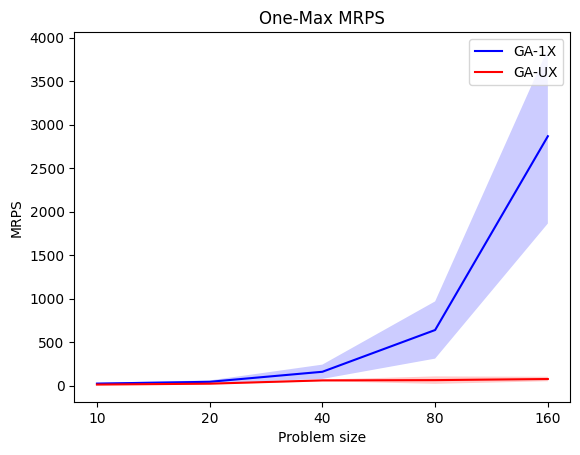

In [92]:
x_scale = [i for i in range(1, 1 + len(l_problem_sizes))]
plt.xticks(x_scale, l_problem_sizes)

onemax_1x_max_mrps = [onemax_1x_mean_mrps[i] + onemax_1x_std_mrps[i] for i in range(len(l_problem_sizes))]
onemax_1x_min_mrps = [onemax_1x_mean_mrps[i] - onemax_1x_std_mrps[i] for i in range(len(l_problem_sizes))]

plt.plot(x_scale, onemax_1x_mean_mrps, label="GA-1X", color='b')
plt.fill_between(x_scale, onemax_1x_max_mrps, onemax_1x_min_mrps, facecolor='b', alpha=0.2)

onemax_ux_max_mrps = [onemax_ux_mean_mrps[i] + onemax_ux_std_mrps[i] for i in range(len(l_problem_sizes))]
onemax_ux_min_mrps = [onemax_ux_mean_mrps[i] - onemax_ux_std_mrps[i] for i in range(len(l_problem_sizes))]

plt.plot(x_scale, onemax_ux_mean_mrps, label="GA-UX", color='r')
plt.fill_between(x_scale, onemax_ux_max_mrps, onemax_ux_min_mrps, facecolor='r', alpha=0.2)

plt.xlabel("Problem size")

plt.ylabel("MRPS")

plt.title("One-Max MRPS")
plt.legend()


#### Num of evaluations

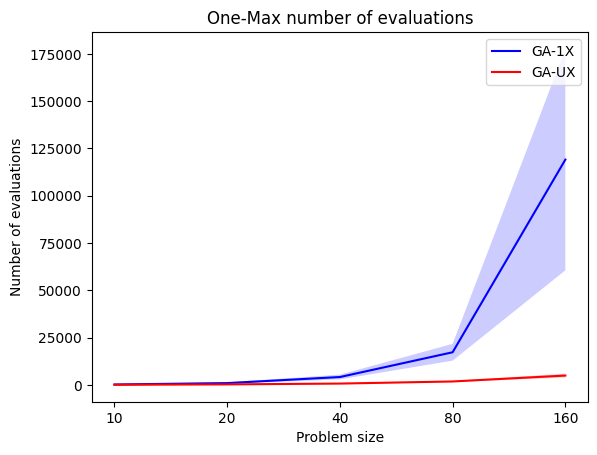

In [119]:
x_scale = [i for i in range(1, 1 + len(l_problem_sizes))]
plt.xticks(x_scale, l_problem_sizes)

onemax_1x_max_num_evaluations = [onemax_1x_mean_num_evaluations[i] + onemax_1x_std_num_evaluations[i] for i in range(len(l_problem_sizes))]
onemax_1x_min_num_evaluations = [onemax_1x_mean_num_evaluations[i] - onemax_1x_std_num_evaluations[i] for i in range(len(l_problem_sizes))]

plt.plot(x_scale, onemax_1x_mean_num_evaluations, label="GA-1X", color='b')
plt.fill_between(x_scale, onemax_1x_max_num_evaluations, onemax_1x_min_num_evaluations, facecolor='b', alpha=0.2)

onemax_ux_max_num_evaluations = [onemax_ux_mean_num_evaluations[i] + onemax_ux_std_num_evaluations[i] for i in range(len(l_problem_sizes))]
onemax_ux_min_num_evaluations = [onemax_ux_mean_num_evaluations[i] - onemax_ux_std_num_evaluations[i] for i in range(len(l_problem_sizes))]

plt.plot(x_scale, onemax_ux_mean_num_evaluations, label="GA-UX", color='r')
plt.fill_between(x_scale, onemax_ux_max_num_evaluations, onemax_ux_min_num_evaluations, facecolor='r', alpha=0.2)

plt.xlabel("Problem size")
# plt.xscale("log")

plt.ylabel("Number of evaluations")
# plt.yscale("log")

plt.title("One-Max number of evaluations")
plt.legend()


## LeadingOnes

### LeadingOnes + GA-1X

In [94]:
leading_one_1x_mean_mrps = []
leading_one_1x_std_mrps = []

leading_one_1x_mean_num_evaluations = []
leading_one_1x_std_num_evaluations = []

for problem_size in l_problem_sizes :
    print('Problem size', problem_size)

    mean_mrps, std_mrps, mean_num_evaluations, std_num_evaluations = bisection(leading_one, one_x_crossover, problem_size)

    print('\tMean_mrps', mean_mrps)
    print('\tStd_mrps', std_mrps)
    print('\tMean_num_evaluations', mean_num_evaluations)
    print('\tStd_num_evaluations', std_num_evaluations)
    print()

    if(mean_mrps):
        leading_one_1x_mean_mrps.append(mean_mrps)
        leading_one_1x_std_mrps.append(std_mrps)

        leading_one_1x_mean_num_evaluations.append(mean_num_evaluations)
        leading_one_1x_std_num_evaluations.append(std_num_evaluations)
    # end_if


Problem size 10
	Lần thứ 1:
		 [21521465, 21521466, 21521467, 21521468, 21521469, 21521470, 21521471, 21521472, 21521473, 21521474]
		 (128, 3302.4)


	Lần thứ 2:
		 [21521475, 21521476, 21521477, 21521478, 21521479, 21521480, 21521481, 21521482, 21521483, 21521484]
		 (64, 1670.4)
	Lần thứ 3:
		 [21521485, 21521486, 21521487, 21521488, 21521489, 21521490, 21521491, 21521492, 21521493, 21521494]
		 (64, 1536.0)
	Lần thứ 4:
		 [21521495, 21521496, 21521497, 21521498, 21521499, 21521500, 21521501, 21521502, 21521503, 21521504]
		 (256, 1536.0)
	Lần thứ 5:
		 [21521505, 21521506, 21521507, 21521508, 21521509, 21521510, 21521511, 21521512, 21521513, 21521514]
		 (128, 3264.0)
	Lần thứ 6:
		 [21521515, 21521516, 21521517, 21521518, 21521519, 21521520, 21521521, 21521522, 21521523, 21521524]
		 (64, 1612.8)
	Lần thứ 7:
		 [21521525, 21521526, 21521527, 21521528, 21521529, 21521530, 21521531, 21521532, 21521533, 21521534]
		 (256, 1478.4)
	Lần thứ 8:
		 [21521535, 21521536, 21521537, 21521538, 21521539, 21521540, 21521541, 21521542, 21521543, 21521544]
		 (128, 3148.8)
	Lần thứ 9:
		 [21521545, 21521546, 21521547, 21521548, 21521549, 215215

### LeadingOnes + GA-UX

In [95]:
leading_one_ux_mean_mrps = []
leading_one_ux_std_mrps = []

leading_one_ux_mean_num_evaluations = []
leading_one_ux_std_num_evaluations = []

for problem_size in l_problem_sizes :
    print('Problem size', problem_size)

    mean_mrps, std_mrps, mean_num_evaluations, std_num_evaluations = bisection(leading_one, ux_crossover, problem_size)

    print('\tMean_mrps', mean_mrps)
    print('\tStd_mrps', std_mrps)
    print('\tMean_num_evaluations', mean_num_evaluations)
    print('\tStd_num_evaluations', std_num_evaluations)
    print()

    if(mean_mrps):
        leading_one_ux_mean_mrps.append(mean_mrps)
        leading_one_ux_std_mrps.append(std_mrps)

        leading_one_ux_mean_num_evaluations.append(mean_num_evaluations)
        leading_one_ux_std_num_evaluations.append(std_num_evaluations)
    # end_if


Problem size 10
	Lần thứ 1:
		 [21521465, 21521466, 21521467, 21521468, 21521469, 21521470, 21521471, 21521472, 21521473, 21521474]
		 (16, 460.8)


	Lần thứ 2:
		 [21521475, 21521476, 21521477, 21521478, 21521479, 21521480, 21521481, 21521482, 21521483, 21521484]
		 (32, 806.4)
	Lần thứ 3:
		 [21521485, 21521486, 21521487, 21521488, 21521489, 21521490, 21521491, 21521492, 21521493, 21521494]
		 (64, 1008.0)
	Lần thứ 4:
		 [21521495, 21521496, 21521497, 21521498, 21521499, 21521500, 21521501, 21521502, 21521503, 21521504]
		 (16, 412.8)
	Lần thứ 5:
		 [21521505, 21521506, 21521507, 21521508, 21521509, 21521510, 21521511, 21521512, 21521513, 21521514]
		 (32, 806.4)
	Lần thứ 6:
		 [21521515, 21521516, 21521517, 21521518, 21521519, 21521520, 21521521, 21521522, 21521523, 21521524]
		 (64, 384.0)
	Lần thứ 7:
		 [21521525, 21521526, 21521527, 21521528, 21521529, 21521530, 21521531, 21521532, 21521533, 21521534]
		 (64, 360.0)
	Lần thứ 8:
		 [21521535, 21521536, 21521537, 21521538, 21521539, 21521540, 21521541, 21521542, 21521543, 21521544]
		 (64, 288.0)
	Lần thứ 9:
		 [21521545, 21521546, 21521547, 21521548, 21521549, 21521550, 215215

### T-test

#### MRPS

In [114]:
from scipy import stats

nob = 10

for i in range( min(len(leading_one_1x_mean_mrps), len(leading_one_ux_mean_mrps)) ):
    alpha = 0.05  # Mức ý nghĩa thống kê

    t_statistic, p_value = stats.ttest_ind_from_stats(leading_one_1x_mean_mrps[i], leading_one_1x_std_mrps[i], nob, leading_one_ux_mean_mrps[i], leading_one_ux_std_mrps[i], nob, )

    print("l = ", l_problem_sizes[i])
    print("\tThống kê t:", t_statistic)
    print("\tGiá trị p:", p_value)

    if p_value <= alpha:
        print("\tCó sự khác biệt có ý nghĩa thống kê giữa hai mẫu.")
        if leading_one_1x_mean_mrps[i] < leading_one_ux_mean_mrps[i]:
            print("\t\tMẫu 1X có ý nghĩa thống kê tốt hơn")
        else:
            print("\t\tMẫu UX có ý nghĩa thống kê tốt hơn")
    else:
        print("\tKhông có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.")


l =  10
	Thống kê t: 3.558885029135166
	Giá trị p: 0.0022431973513472206
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn
l =  20
	Thống kê t: 4.98907898222799
	Giá trị p: 9.506250105831367e-05
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn
l =  40
	Thống kê t: 5.376450423005547
	Giá trị p: 4.140836852733744e-05
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn
l =  80
	Thống kê t: nan
	Giá trị p: nan
	Không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
l =  160
	Thống kê t: nan
	Giá trị p: nan
	Không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.


#### Number of evaluations

In [115]:
from scipy import stats

nob = 10

for i in range( min(len(leading_one_1x_mean_num_evaluations), len(leading_one_ux_mean_num_evaluations)) ):
    alpha = 0.05  # Mức ý nghĩa thống kê

    t_statistic, p_value = stats.ttest_ind_from_stats(leading_one_1x_mean_num_evaluations[i], leading_one_1x_std_num_evaluations[i], nob, leading_one_ux_mean_num_evaluations[i], leading_one_ux_std_num_evaluations[i], nob, )

    print("l = ", l_problem_sizes[i])
    print("\tThống kê t:", t_statistic)
    print("\tGiá trị p:", p_value)

    if p_value <= alpha:
        print("\tCó sự khác biệt có ý nghĩa thống kê giữa hai mẫu.")
        if leading_one_1x_mean_num_evaluations[i] < leading_one_ux_mean_num_evaluations[i]:
            print("\t\tMẫu 1X có ý nghĩa thống kê tốt hơn")
        else:
            print("\t\tMẫu UX có ý nghĩa thống kê tốt hơn")
    else:
        print("\tKhông có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.")


l =  10
	Thống kê t: 6.009924298552803
	Giá trị p: 1.104328837043853e-05
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu UX có ý nghĩa thống kê tốt hơn
l =  20
	Thống kê t: 1.1253974727062426
	Giá trị p: 0.27520328172866193
	Không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
l =  40
	Thống kê t: 0.646294614077679
	Giá trị p: 0.5262438351272193
	Không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
l =  80
	Thống kê t: nan
	Giá trị p: nan
	Không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
l =  160
	Thống kê t: nan
	Giá trị p: nan
	Không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.


### Plot

#### MRPS

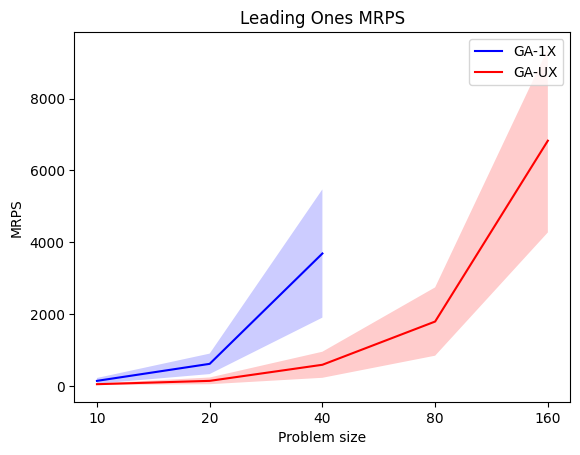

In [98]:
x_scale = [i for i in range(1, 1 + len(l_problem_sizes))]
plt.xticks(x_scale, l_problem_sizes)

leading_one_1x_max_mrps = [leading_one_1x_mean_mrps[i] + leading_one_1x_std_mrps[i] for i in range(len(l_problem_sizes))]
leading_one_1x_min_mrps = [leading_one_1x_mean_mrps[i] - leading_one_1x_std_mrps[i] for i in range(len(l_problem_sizes))]

plt.plot(x_scale, leading_one_1x_mean_mrps, label="GA-1X", color='b')
plt.fill_between(x_scale, leading_one_1x_max_mrps, leading_one_1x_min_mrps, facecolor='b', alpha=0.2)

leading_one_ux_max_mrps = [leading_one_ux_mean_mrps[i] + leading_one_ux_std_mrps[i] for i in range(len(l_problem_sizes))]
leading_one_ux_min_mrps = [leading_one_ux_mean_mrps[i] - leading_one_ux_std_mrps[i] for i in range(len(l_problem_sizes))]

plt.plot(x_scale, leading_one_ux_mean_mrps, label="GA-UX", color='r')
plt.fill_between(x_scale, leading_one_ux_max_mrps, leading_one_ux_min_mrps, facecolor='r', alpha=0.2)

plt.xlabel("Problem size")

plt.ylabel("MRPS")

plt.title("Leading Ones MRPS")
plt.legend()


#### Num of evaluations

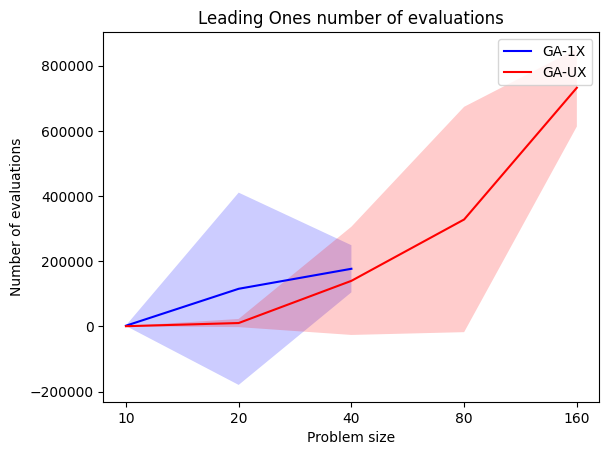

In [123]:
x_scale = [i for i in range(1, 1 + len(l_problem_sizes))]
plt.xticks(x_scale, l_problem_sizes)

leading_one_1x_max_num_evaluations = [leading_one_1x_mean_num_evaluations[i] + leading_one_1x_std_num_evaluations[i] for i in range (len(l_problem_sizes))]

leading_one_1x_min_num_evaluations = [leading_one_1x_mean_num_evaluations[i] - leading_one_1x_std_num_evaluations[i] for i in range (len(l_problem_sizes))]

plt.plot(x_scale, leading_one_1x_mean_num_evaluations, label="GA-1X", color='b')
plt.fill_between(x_scale, leading_one_1x_max_num_evaluations, leading_one_1x_min_num_evaluations, facecolor='b', alpha=0.2)

leading_one_ux_max_num_evaluations = [leading_one_ux_mean_num_evaluations[i] + leading_one_ux_std_num_evaluations[i] for i in range (len(l_problem_sizes))]

leading_one_ux_min_num_evaluations = [leading_one_ux_mean_num_evaluations[i] - leading_one_ux_std_num_evaluations[i] for i in range (len(l_problem_sizes))]

plt.plot(x_scale, leading_one_ux_mean_num_evaluations, label="GA-UX", color='r')
plt.fill_between(x_scale, leading_one_ux_max_num_evaluations, leading_one_ux_min_num_evaluations, facecolor='r', alpha=0.2)

plt.xlabel("Problem size")
# plt.xscale("log")

plt.ylabel("Number of evaluations")

plt.title("Leading Ones number of evaluations")
plt.legend();


## Trap-5

### Trap-5 + GA-1X

In [100]:
trap_5_1x_mean_mrps = []
trap_5_1x_std_mrps = []

trap_5_1x_mean_num_evaluations = []
trap_5_1x_std_num_evaluations = []

for problem_size in l_problem_sizes :
    print('Problem size', problem_size)

    mean_mrps, std_mrps, mean_num_evaluations, std_num_evaluations = bisection(trap_5, one_x_crossover, problem_size)

    print('\tMean_mrps', mean_mrps)
    print('\tStd_mrps', std_mrps)
    print('\tMean_num_evaluations', mean_num_evaluations)
    print('\tStd_num_evaluations', std_num_evaluations)
    print()

    if(mean_mrps):
        trap_5_1x_mean_mrps.append(mean_mrps)
        trap_5_1x_std_mrps.append(std_mrps)

        trap_5_1x_mean_num_evaluations.append(mean_num_evaluations)
        trap_5_1x_std_num_evaluations.append(std_num_evaluations)
    # end_if


Problem size 10
	Lần thứ 1:
		 [21521465, 21521466, 21521467, 21521468, 21521469, 21521470, 21521471, 21521472, 21521473, 21521474]
		 (128, 672.0)
	Lần thứ 2:
		 [21521475, 21521476, 21521477, 21521478, 21521479, 21521480, 21521481, 21521482, 21521483, 21521484]
		 (128, 778.6666666666666)
	Lần thứ 3:
		 [21521485, 21521486, 21521487, 21521488, 21521489, 21521490, 21521491, 21521492, 21521493, 21521494]
		 (64, 336.0)
	Lần thứ 4:
		 [21521495, 21521496, 21521497, 21521498, 21521499, 21521500, 21521501, 21521502, 21521503, 21521504]
		 (32, 787.2)


	Lần thứ 5:
		 [21521505, 21521506, 21521507, 21521508, 21521509, 21521510, 21521511, 21521512, 21521513, 21521514]
		 (128, 828.0)
	Lần thứ 6:
		 [21521515, 21521516, 21521517, 21521518, 21521519, 21521520, 21521521, 21521522, 21521523, 21521524]
		 (32, 739.2)
	Lần thứ 7:
		 [21521525, 21521526, 21521527, 21521528, 21521529, 21521530, 21521531, 21521532, 21521533, 21521534]
		 (32, 806.4)
	Lần thứ 8:
		 [21521535, 21521536, 21521537, 21521538, 21521539, 21521540, 21521541, 21521542, 21521543, 21521544]
		 (128, 704.0)
	Lần thứ 9:
		 [21521545, 21521546, 21521547, 21521548, 21521549, 21521550, 21521551, 21521552, 21521553, 21521554]
		 (32, 787.2)
	Lần thứ 10:
		 [21521555, 21521556, 21521557, 21521558, 21521559, 21521560, 21521561, 21521562, 21521563, 21521564]
		 (128, 746.6666666666666)
	Mean_mrps 83.2
	Std_mrps 45.70514194267424
	Mean_num_evaluations 718.5333333333334
	Std_num_evaluations 135.15792902296846

Problem size 20
	Lần thứ 1:
		 [21521465, 21521466, 21521467, 21521468, 2

### Trap-5 + GA-UX

In [101]:
trap_5_ux_mean_mrps = []
trap_5_ux_std_mrps = []

trap_5_ux_mean_num_evaluations = []
trap_5_ux_std_num_evaluations = []

for problem_size in l_problem_sizes :
    print('Problem size', problem_size)

    mean_mrps, std_mrps, mean_num_evaluations, std_num_evaluations = bisection(trap_5, ux_crossover, problem_size)

    print('\tMean_mrps', mean_mrps)
    print('\tStd_mrps', std_mrps)
    print('\tMean_num_evaluations', mean_num_evaluations)
    print('\tStd_num_evaluations', std_num_evaluations)
    print()

    if(mean_mrps):
        trap_5_ux_mean_mrps.append(mean_mrps)
        trap_5_ux_std_mrps.append(std_mrps)

        trap_5_ux_mean_num_evaluations.append(mean_num_evaluations)
        trap_5_ux_std_num_evaluations.append(std_num_evaluations)
    # end_if


Problem size 10


	Lần thứ 1:
		 [21521465, 21521466, 21521467, 21521468, 21521469, 21521470, 21521471, 21521472, 21521473, 21521474]
		 (512, 3840.0)
	Lần thứ 2:
		 [21521475, 21521476, 21521477, 21521478, 21521479, 21521480, 21521481, 21521482, 21521483, 21521484]
		 (256, 8678.4)
	Lần thứ 3:
		 [21521485, 21521486, 21521487, 21521488, 21521489, 21521490, 21521491, 21521492, 21521493, 21521494]
		 (512, 5952.0)
	Lần thứ 4:
		 [21521495, 21521496, 21521497, 21521498, 21521499, 21521500, 21521501, 21521502, 21521503, 21521504]
		 (128, 4032.0)
	Lần thứ 5:
		 [21521505, 21521506, 21521507, 21521508, 21521509, 21521510, 21521511, 21521512, 21521513, 21521514]
		 (512, 4416.0)
	Lần thứ 6:
		 [21521515, 21521516, 21521517, 21521518, 21521519, 21521520, 21521521, 21521522, 21521523, 21521524]
		 (256, 1824.0)
	Lần thứ 7:
		 [21521525, 21521526, 21521527, 21521528, 21521529, 21521530, 21521531, 21521532, 21521533, 21521534]
		 (512, 3072.0)
	Lần thứ 8:
		 [21521535, 21521536, 21521537, 21521538, 21521539, 215

### T-test

#### MRPS

In [116]:
from scipy import stats

nob = 10

for i in range( min(len(trap_5_1x_mean_mrps), len(trap_5_ux_mean_mrps)) ):
    alpha = 0.05  # Mức ý nghĩa thống kê

    t_statistic, p_value = stats.ttest_ind_from_stats(trap_5_1x_mean_mrps[i], trap_5_1x_std_mrps[i], nob, trap_5_ux_mean_mrps[i], trap_5_ux_std_mrps[i], nob, )

    print("l = ", l_problem_sizes[i])
    print("\tThống kê t:", t_statistic)
    print("\tGiá trị p:", p_value)

    if p_value <= alpha:
        print("\tCó sự khác biệt có ý nghĩa thống kê giữa hai mẫu.")
        if trap_5_1x_mean_mrps[i] < trap_5_ux_mean_mrps[i]:
            print("\t\tMẫu 1X có ý nghĩa thống kê tốt hơn")
        else:
            print("\t\tMẫu UX có ý nghĩa thống kê tốt hơn")
    else:
        print("\tKhông có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.")


l =  10
	Thống kê t: -5.654039448388764
	Giá trị p: 2.306424976987015e-05
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu 1X có ý nghĩa thống kê tốt hơn
l =  20
	Thống kê t: -5.729985969328072
	Giá trị p: 1.9683673290276536e-05
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu 1X có ý nghĩa thống kê tốt hơn
l =  40
	Thống kê t: nan
	Giá trị p: nan
	Không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
l =  80
	Thống kê t: nan
	Giá trị p: nan
	Không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
l =  160
	Thống kê t: nan
	Giá trị p: nan
	Không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.


#### Number of evaluations

In [117]:
from scipy import stats

nob = 10

for i in range( min(len(trap_5_1x_mean_num_evaluations), len(trap_5_ux_mean_num_evaluations)) ):
    alpha = 0.05  # Mức ý nghĩa thống kê

    t_statistic, p_value = stats.ttest_ind_from_stats(trap_5_1x_mean_num_evaluations[i], trap_5_1x_std_num_evaluations[i], nob, trap_5_ux_mean_num_evaluations[i], trap_5_ux_std_num_evaluations[i], nob, )

    print("l = ", l_problem_sizes[i])
    print("\tThống kê t:", t_statistic)
    print("\tGiá trị p:", p_value)

    if p_value <= alpha:
        print("\tCó sự khác biệt có ý nghĩa thống kê giữa hai mẫu.")
        if trap_5_1x_mean_num_evaluations[i] < trap_5_ux_mean_num_evaluations[i]:
            print("\t\tMẫu 1X có ý nghĩa thống kê tốt hơn")
        else:
            print("\t\tMẫu UX có ý nghĩa thống kê tốt hơn")
    else:
        print("\tKhông có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.")


l =  10
	Thống kê t: -6.777753464050122
	Giá trị p: 2.3852255741546533e-06
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu 1X có ý nghĩa thống kê tốt hơn
l =  20
	Thống kê t: -6.179181467091639
	Giá trị p: 7.824508842494563e-06
	Có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
		Mẫu 1X có ý nghĩa thống kê tốt hơn
l =  40
	Thống kê t: nan
	Giá trị p: nan
	Không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
l =  80
	Thống kê t: nan
	Giá trị p: nan
	Không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.
l =  160
	Thống kê t: nan
	Giá trị p: nan
	Không có đủ bằng chứng để kết luận rằng có sự khác biệt có ý nghĩa thống kê giữa hai mẫu.


### Plot

#### MRPS

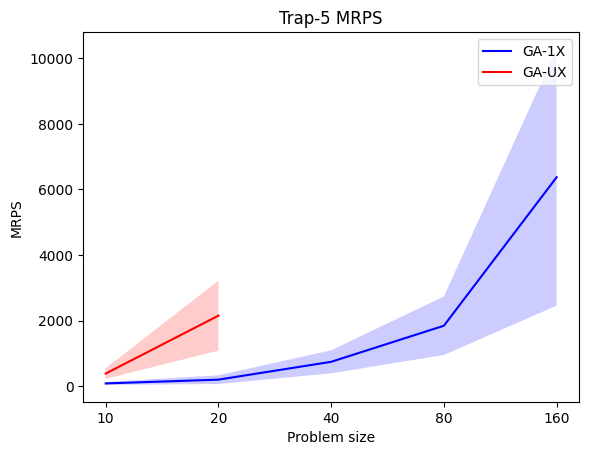

In [104]:
x_scale = [i for i in range(1, 1 + len(l_problem_sizes))]
plt.xticks(x_scale, l_problem_sizes)

trap_5_1x_max_mrps = [trap_5_1x_mean_mrps[i] + trap_5_1x_std_mrps[i] for i in range(len(l_problem_sizes))]
trap_5_1x_min_mrps = [trap_5_1x_mean_mrps[i] - trap_5_1x_std_mrps[i] for i in range(len(l_problem_sizes))]

plt.plot(x_scale, trap_5_1x_mean_mrps, label="GA-1X", color='b')
plt.fill_between(x_scale, trap_5_1x_max_mrps, trap_5_1x_min_mrps, facecolor='b', alpha=0.2)

trap_5_ux_max_mrps = [trap_5_ux_mean_mrps[i] + trap_5_ux_std_mrps[i] for i in range(len(l_problem_sizes))]
trap_5_ux_min_mrps = [trap_5_ux_mean_mrps[i] - trap_5_ux_std_mrps[i] for i in range(len(l_problem_sizes))]

plt.plot(x_scale, trap_5_ux_mean_mrps, label="GA-UX", color='r')
plt.fill_between(x_scale, trap_5_ux_max_mrps, trap_5_ux_min_mrps, facecolor='r', alpha=0.2)

plt.xlabel("Problem size")
# plt.xscale("log")

plt.ylabel("MRPS")

plt.title("Trap-5 MRPS")
plt.legend();


#### Num of evaluations

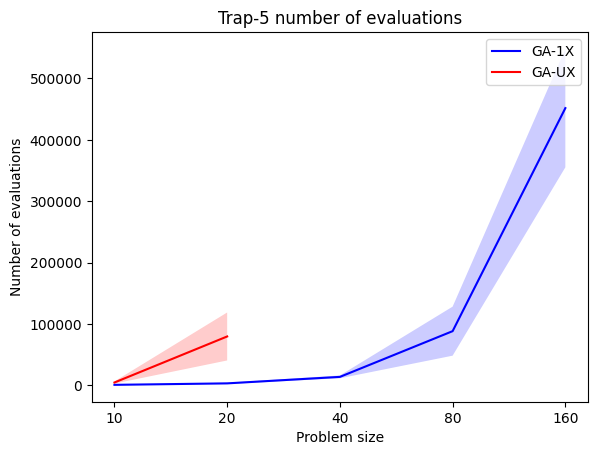

In [108]:
x_scale = [i for i in range(1, 1 + len(l_problem_sizes))]
plt.xticks(x_scale, l_problem_sizes)

trap_5_1x_max_num_evaluations = [trap_5_1x_mean_num_evaluations[i] + trap_5_1x_std_num_evaluations[i] for i in range(len(l_problem_sizes))]

trap_5_1x_min_num_evaluations = [trap_5_1x_mean_num_evaluations[i] - trap_5_1x_std_num_evaluations[i] for i in range(len(l_problem_sizes))]

plt.plot(x_scale, trap_5_1x_mean_num_evaluations, label="GA-1X", color='b')
plt.fill_between(x_scale, trap_5_1x_max_num_evaluations, trap_5_1x_min_num_evaluations, facecolor='b', alpha=0.2)

trap_5_ux_max_num_evaluations = [trap_5_ux_mean_num_evaluations[i] + trap_5_ux_std_num_evaluations[i] for i in range(len(l_problem_sizes))]

trap_5_ux_min_num_evaluations = [trap_5_ux_mean_num_evaluations[i] - trap_5_ux_std_num_evaluations[i] for i in range(len(l_problem_sizes))]

plt.plot(x_scale, trap_5_ux_mean_num_evaluations, label="GA-UX", color='r')
plt.fill_between(x_scale, trap_5_ux_max_num_evaluations, trap_5_ux_min_num_evaluations, facecolor='r', alpha=0.2)

plt.xlabel("Problem size")
# plt.xscale("log")

plt.ylabel("Number of evaluations")

plt.title("Trap-5 number of evaluations")
plt.legend();
